In [56]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statsmodels.api as sm 

In [184]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [185]:
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [186]:
df = df[df.Location == "Perth"]
df.isna().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            1
Rainfall           0
Evaporation        1
Sunshine           5
WindGustDir        5
WindGustSpeed      5
WindDir9am       134
WindDir3pm         7
WindSpeed9am       0
WindSpeed3pm       1
Humidity9am        9
Humidity3pm        8
Pressure9am        1
Pressure3pm        1
Cloud9am           2
Cloud3pm           4
Temp9am            0
Temp3pm            1
RainToday          0
RISK_MM            0
RainTomorrow       0
dtype: int64

In [187]:
df.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
120895,2017-06-21,Perth,10.3,19.9,0.2,1.8,7.5,NW,37.0,NNE,...,60.0,1017.1,1013.8,5.0,6.0,13.0,18.5,No,61.2,Yes
120896,2017-06-22,Perth,13.0,16.8,61.2,3.6,0.0,SSW,46.0,W,...,75.0,1005.6,1008.9,7.0,7.0,16.4,15.6,Yes,0.4,No
120897,2017-06-23,Perth,13.3,18.9,0.4,1.8,6.5,SE,37.0,SE,...,65.0,1019.2,1019.4,6.0,6.0,15.1,18.0,No,0.0,No
120898,2017-06-24,Perth,11.5,18.2,0.0,3.8,9.3,SE,30.0,ESE,...,47.0,1025.9,1023.4,1.0,3.0,14.0,17.6,No,0.0,No
120899,2017-06-25,Perth,6.3,17.0,0.0,1.6,7.9,E,26.0,SE,...,49.0,1028.6,1026.0,1.0,3.0,11.5,15.6,No,0.0,No


In [188]:
df["Location"].value_counts(ascending=False)

Perth    3193
Name: Location, dtype: int64

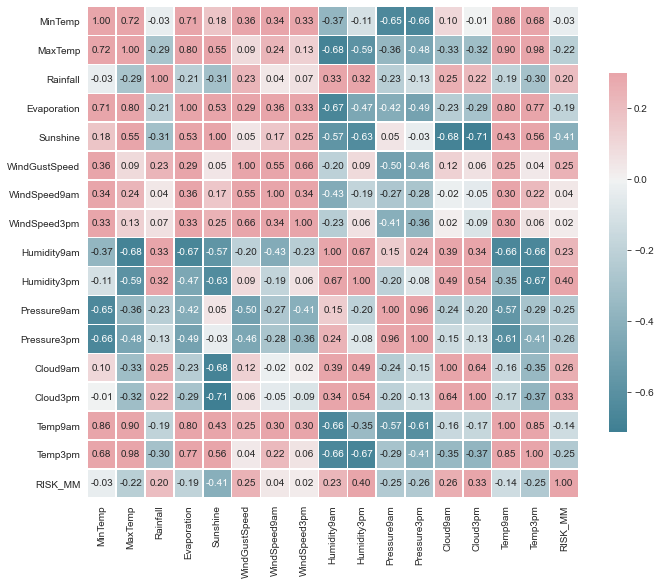

In [189]:
plt.subplots(figsize=(11,11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(),vmax=.3, annot=True,center=0, cmap=cmap, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .6});


In [190]:
df["Rainfall"].isna().sum()

0

In [191]:
df["RainToday"].isna().sum()

0

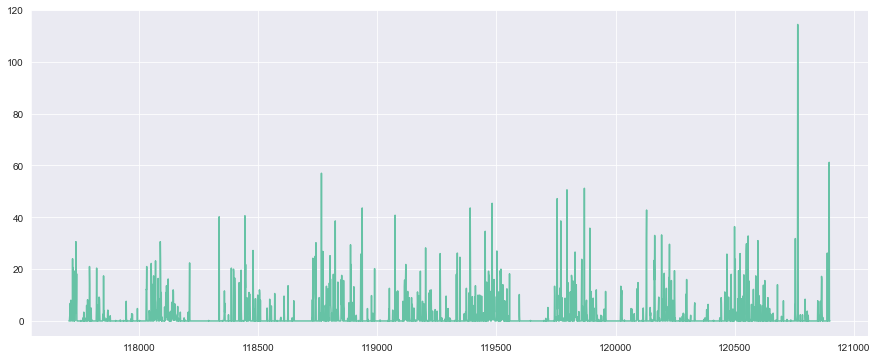

In [192]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.figure(figsize=[15,6])
plt.plot(df["Rainfall"])

## Explanatory Analysis

In [193]:
df.dropna(subset=["Date", "Rainfall"], inplace=True)

In [194]:
df.isna().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            1
Rainfall           0
Evaporation        1
Sunshine           5
WindGustDir        5
WindGustSpeed      5
WindDir9am       134
WindDir3pm         7
WindSpeed9am       0
WindSpeed3pm       1
Humidity9am        9
Humidity3pm        8
Pressure9am        1
Pressure3pm        1
Cloud9am           2
Cloud3pm           4
Temp9am            0
Temp3pm            1
RainToday          0
RISK_MM            0
RainTomorrow       0
dtype: int64

In [195]:
df['Date'] = pd.to_datetime(df['Date'])

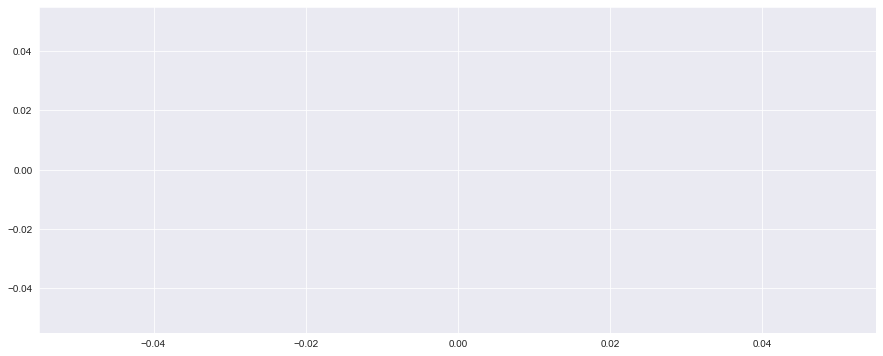

In [196]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.figure(figsize=[15,6])
plt.plot(df[df.Location == "Adelaide"]["Rainfall"])
plt.show()

In [197]:
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
df['Month'] = df['Date'].dt.month
df['Weakday'] = df['Date'].dt.weekday
df['Day'] = df['Date'].dt.day

In [198]:
monthly_mean = df[df.RainToday == "Yes"].groupby("Month").aggregate("mean")["Rainfall"]
monthly_mean = df.groupby("Month").aggregate("mean")["Rainfall"]
monthly_mean = pd.DataFrame(monthly_mean)

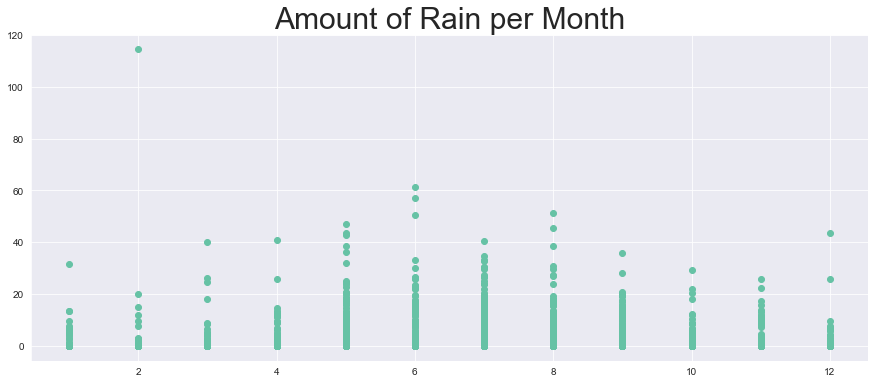

In [199]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
plt.figure(figsize=[15,6])
plt.scatter(df['Month'], df['Rainfall'])
plt.title( "Amount of Rain per Month",size = 30)
plt.show()

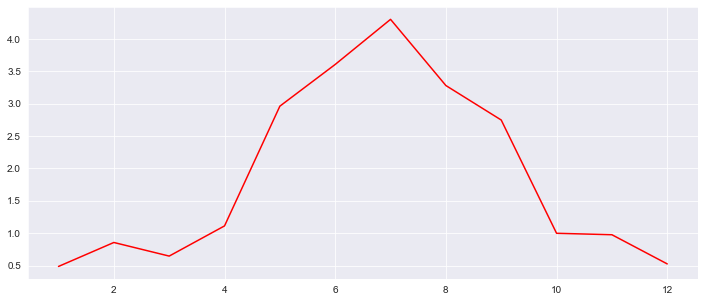

In [200]:
plt.figure(figsize=(12,5))
plt.plot(monthly_mean.index, monthly_mean, color='r')
plt.show()

In [201]:
monthly_mean

,Rainfall
Month,
1,0.486738
2,0.856637
3,0.646595
4,1.112500
5,2.960573
6,3.604528
7,4.300358
8,3.278853
9,2.746667


ToDos: Autokorrelationsfunktion 

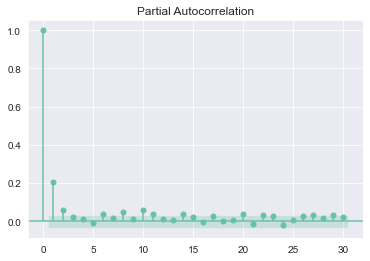

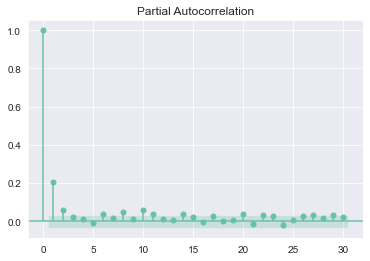

In [202]:
#plt.figure(figsize=(20,10))
sm.graphics.tsa.plot_pacf(df["Rainfall"], lags=30)

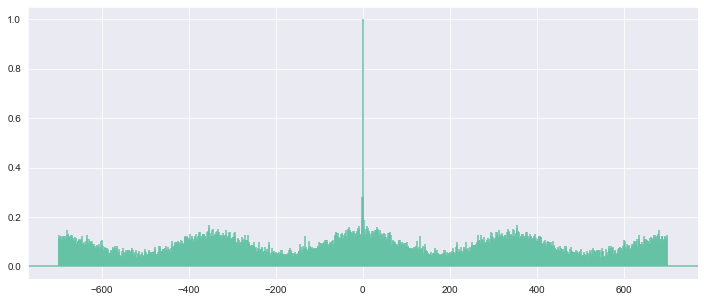

In [203]:
plt.figure(figsize=(12,5))
plt.acorr(df["Rainfall"], maxlags = 700)
plt.show()

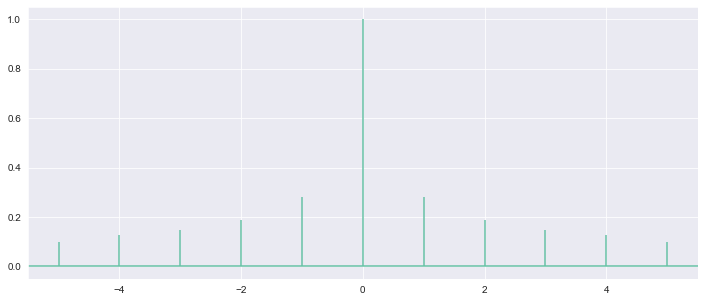

In [204]:
plt.figure(figsize=(12,5))
plt.acorr(df["Rainfall"], maxlags = 5)
plt.show()

mit diesen Ergebnissen (Periode = 12) dann moving average und Bereinigung um Saisonale Komponente 

a) Mithilfe Differenz des Niederschlags genau ein Jahr zuvor 

In [205]:
X = df.Rainfall
len(X)

3193

In [206]:
X.iloc[25]

12.6

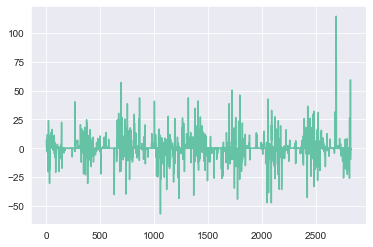

In [207]:
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	value = X.iloc[i] - X.iloc[i - days_in_year]
	diff.append(value)
plt.plot(diff)
plt.show()

b) Mithilfe Differenz des Monatsmittels

In [208]:
df2 = pd.read_csv('weatherAUS.csv', index_col=0, parse_dates=True)
df2.dropna(subset=["Rainfall","MinTemp"], inplace=True)

In [209]:
df2 = df2[df2.Location == "Adelaide"]

In [210]:
Rainfall_mean = df2.Rainfall.resample("M").mean()

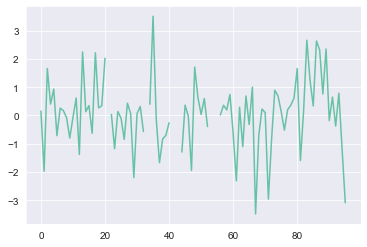

In [211]:
Rainfall = df2.Rainfall
diff = list()
months_in_year = 12
for i in range(months_in_year, len(Rainfall_mean)):
	value = Rainfall_mean.iloc[i] - Rainfall_mean.iloc[i - months_in_year]
	diff.append(value)
plt.plot(diff)
plt.show()

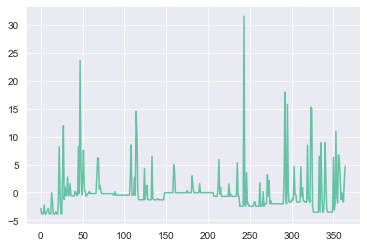

In [212]:
diff = list()
days_in_year = 365
for i in range(days_in_year, len(Rainfall)):
    month_str = str(Rainfall.index[i].year-1)+'-'+str(Rainfall.index[i].month)
    month_mean_last_year = Rainfall[month_str].mean()
    value = Rainfall.iloc[i] - month_mean_last_year
    diff.append(value)
plt.plot(diff[:365])
plt.show()

In [213]:
Rainfall["2008-07-01"]

5.0

In [214]:
Rainfall["2009-4-18"].mean()

0.0

In [215]:
Rainfall

Date
2008-07-01     5.0
2008-07-02     0.8
2008-07-03     0.0
2008-07-04     0.0
2008-07-07    16.2
              ... 
2017-06-20     0.0
2017-06-21     0.0
2017-06-22     0.0
2017-06-23     0.0
2017-06-24     0.0
Name: Rainfall, Length: 3019, dtype: float64

C:\Users\Johannes\Envs\p1\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


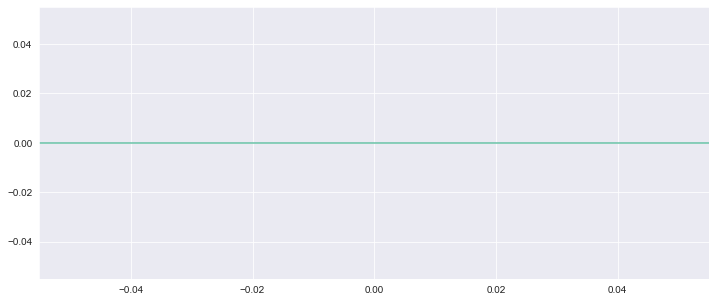

In [216]:
plt.figure(figsize=(12,5))
plt.acorr(diff, maxlags = 5)
plt.show()

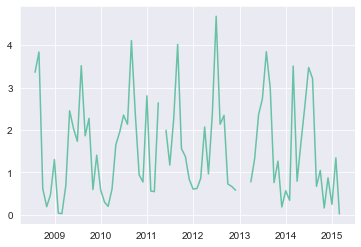

In [217]:
plt.plot(Rainfall_mean.iloc[:80])

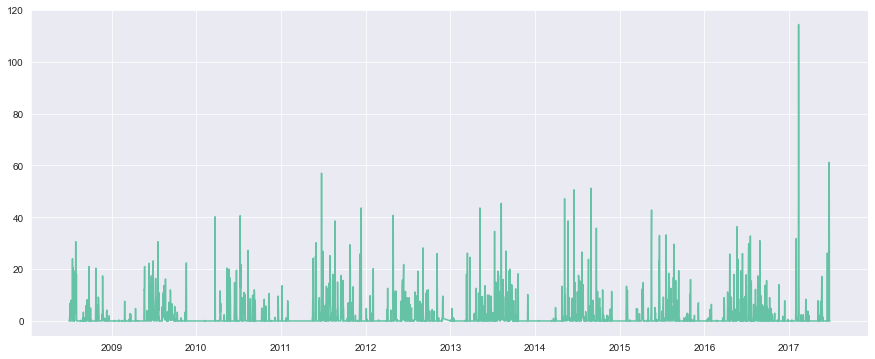

In [218]:
plt.figure(figsize=[15,6])
plt.plot(df["Date"], df["Rainfall"]);

ToDo: Über Monate aggegieren und Autokorrelation plotten (siehe Matlab Übung 1)

In [219]:
df.dropna(subset=["Date", "MaxTemp"], inplace=True)

In [220]:
from statsmodels.tsa.seasonal import seasonal_decompose 

result = seasonal_decompose(df.MaxTemp, model = "additive", freq=365)

<ipython-input-220-94e0e0d9d436>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df.MaxTemp, model = "additive", freq=365)


<AxesSubplot:>

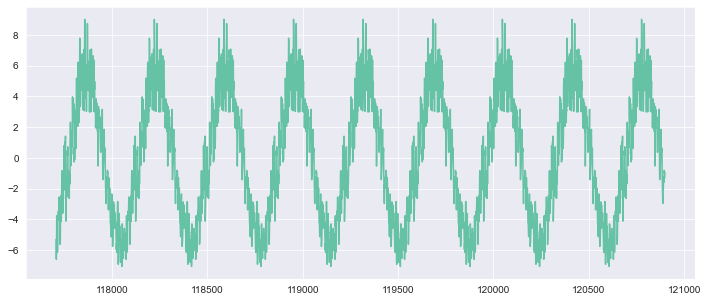

In [221]:
plt.figure(figsize=(12,5))
result.seasonal.plot()

<AxesSubplot:>

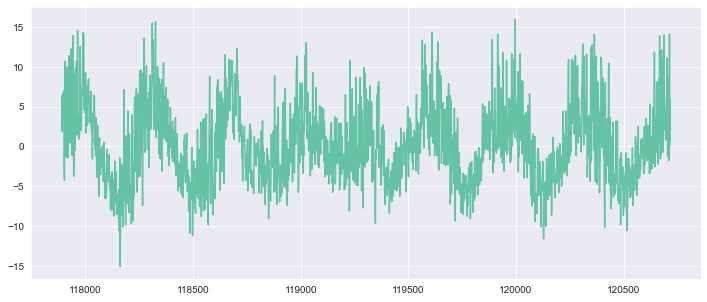

In [222]:
plt.figure(figsize=(12,5))
result.resid.plot()

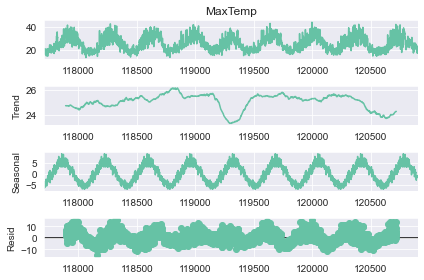

<Figure size 864x360 with 0 Axes>

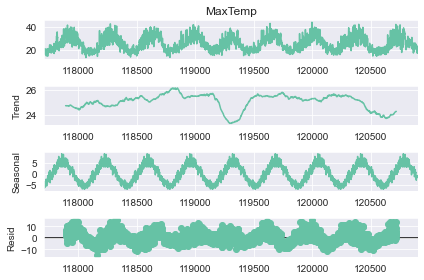

In [223]:
plt.figure(figsize=(12,5))
result.plot()

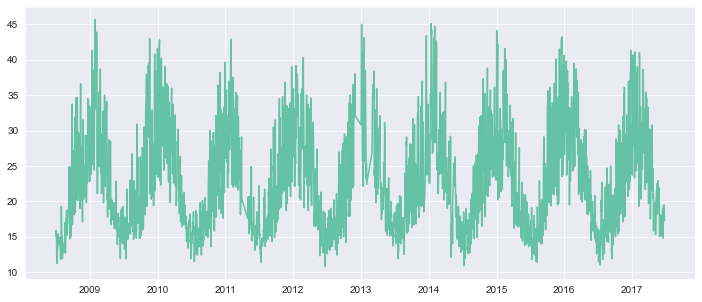

In [224]:
plt.figure(figsize=(12,5))
plt.plot(df2.MaxTemp)

In [228]:
result.resid.dropna(inplace=True)

In [229]:
result2 = seasonal_decompose(result.resid, model = "additive", freq=365)

<ipython-input-229-e2c2b27c0f1b>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result2 = seasonal_decompose(result.resid, model = "additive", freq=365)


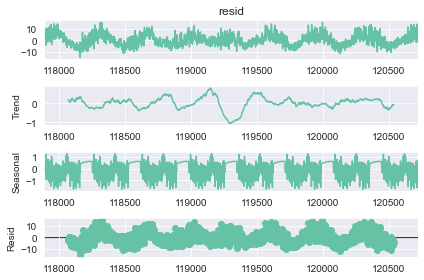

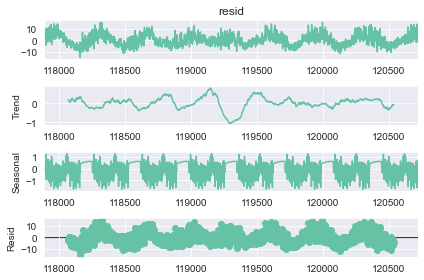

In [232]:
result2.plot()